### https://www.kaggle.com/code/adetunjifavour/icu-prediction

GRAPHS

In [ ]:
!pip install opendatasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import sklearn as sk
#import graphviz
#import tensorflow as tf
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/Sírio-Libanes/covid19")
df = pd.read_excel("covid19/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")

Skipping, found downloaded files in "./covid19" (use force=True to force download)


In [ ]:
df = pd.DataFrame(df)
df.head(30)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
5,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
6,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,1
7,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,1
8,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.880952,-1.000000,-0.906832,-0.831132,-0.940967,-0.817204,-0.882574,-1.000000,6-12,1
9,1,1,90th,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.142857,-0.797980,0.315690,0.200359,-0.239515,0.645161,0.139709,-0.802317,ABOVE_12,1


### FILLING MISSING DATA
As suggested by dataset's authors, patient's missing data can be filled by neighbouring windows.

https://www.kaggle.com/code/fernandoramacciotti/early-icu-detection-only-0-2-window/notebook

In [ ]:
#no_null_df = df['PATIENT_VISIT_IDENTIFIER']
df['PATIENT_VISIT_IDENTIFIER_copy'] = df['PATIENT_VISIT_IDENTIFIER']

df = df\
    .sort_values(by=['PATIENT_VISIT_IDENTIFIER', 'WINDOW'])\
    .groupby('PATIENT_VISIT_IDENTIFIER', as_index=False)\
    .fillna(method='ffill')\
    .fillna(method='bfill')



In [ ]:
df.head(30)

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,PATIENT_VISIT_IDENTIFIER_copy
0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0,0
1,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0,0
2,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0,0
3,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0,0
4,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1,0
5,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1,1
6,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,1,1
7,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,1,1
8,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.000000,-0.906832,-0.831132,-0.940967,-0.817204,-0.882574,-1.000000,6-12,1,1
9,1,90th,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,-0.797980,0.315690,0.200359,-0.239515,0.645161,0.139709,-0.802317,ABOVE_12,1,1


### WILL NEED ICU COLUMN

In [ ]:
df_ID_ICU = df.loc[df["ICU"] == 1]["PATIENT_VISIT_IDENTIFIER_copy"].unique()
will_need_icu = np.zeros_like(df.index)

for index, row in df.iterrows():
    isit = row["PATIENT_VISIT_IDENTIFIER_copy"] in df_ID_ICU
    will_need_icu[index] = 1 if isit else 0
            
df['WILL_NEED_ICU'] = will_need_icu

df

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,PATIENT_VISIT_IDENTIFIER_copy,WILL_NEED_ICU
0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0,0,1
1,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0,0,1
2,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0,0,1
3,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0,0,1
4,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0,384,0
1921,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0,384,0
1922,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0,384,0
1923,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0,384,0


### MODIFYING DATA

In [ ]:
df['AGE_PERCENTIL'] = df['AGE_PERCENTIL'].map({'10th': 10, 
                                               '20th': 20,
                                               '30th': 30,
                                               '40th': 40,
                                               '50th': 50,
                                               '60th': 60,
                                               '70th': 70,
                                               '80th': 80,
                                               '90th': 90,
                                               'Above 90th': 100}).astype(int)

df['WINDOW'] = df['WINDOW'].map({'0-2': 0,
                                 '2-4': 1,
                                 '4-6': 2,
                                 '6-12': 3,
                                 'ABOVE_12': 4}).astype(int)

df_non_numerical = df.columns[np.where(df.dtypes == 'object')].to_list()

df.head(20)

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,PATIENT_VISIT_IDENTIFIER_copy,WILL_NEED_ICU
0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0,0,1
1,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,0,0,1
2,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2,0,0,1
3,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3,0,0,1
4,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,4,1,0,1
5,1,90,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,1,1,1
6,1,90,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,1,1,1
7,1,90,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2,1,1,1
8,1,90,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.906832,-0.831132,-0.940967,-0.817204,-0.882574,-1.000000,3,1,1,1
9,1,90,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.315690,0.200359,-0.239515,0.645161,0.139709,-0.802317,4,1,1,1


In [ ]:
df.loc[(df['PATIENT_VISIT_IDENTIFIER_copy'] == 2) & (df['WINDOW'] == 4)]

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,PATIENT_VISIT_IDENTIFIER_copy,WILL_NEED_ICU
14,0,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.612422,-0.343258,-0.576744,-0.695341,-0.505464,-0.900129,4,1,2,1


In [ ]:
df_copy = df.iloc[:,12:-4]

In [ ]:
titles = []

for columns in df_copy.columns:
    titles.append(columns+"_first")
    titles.append(columns+"_last")

In [ ]:
new_df = pd.DataFrame(columns=["PATIENT_VISIT_IDENTIFIER"]+ titles + ["WINDOW", "ICU"])

new_df["PATIENT_VISIT_IDENTIFIER"] = df["PATIENT_VISIT_IDENTIFIER_copy"].unique()
will_need_icu = np.zeros_like(new_df)

for index, row in new_df.iterrows():
    isit = row["PATIENT_VISIT_IDENTIFIER"] in df_ID_ICU
    will_need_icu[index] = 1 if isit else 0

new_df["ICU"] = will_need_icu

new_df

,PATIENT_VISIT_IDENTIFIER,ALBUMIN_MEDIAN_first,ALBUMIN_MEDIAN_last,ALBUMIN_MEAN_first,ALBUMIN_MEAN_last,ALBUMIN_MIN_first,ALBUMIN_MIN_last,ALBUMIN_MAX_first,ALBUMIN_MAX_last,ALBUMIN_DIFF_first,...,HEART_RATE_DIFF_REL_first,HEART_RATE_DIFF_REL_last,RESPIRATORY_RATE_DIFF_REL_first,RESPIRATORY_RATE_DIFF_REL_last,TEMPERATURE_DIFF_REL_first,TEMPERATURE_DIFF_REL_last,OXYGEN_SATURATION_DIFF_REL_first,OXYGEN_SATURATION_DIFF_REL_last,WINDOW,ICU
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
381,381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
382,382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
383,383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
# for id in new_df['PATIENT_VISIT_IDENTIFIER']:
#   while 

In [ ]:
for columns in df.columns[12:-4]:
  first_values = []
  for row in range(0, len(df.index), 5) :
    first_values.append(df.iloc[row][columns])
  new_df[columns+"_first"]= first_values

In [ ]:
#i = 0

for id in new_df['PATIENT_VISIT_IDENTIFIER']:
 # i+=1
 # if i > 3:
 #   break;
  
  patient = df.loc[df['PATIENT_VISIT_IDENTIFIER_copy'] == id, :]

  #display(patient)

  for idx in patient.index:
    if patient.loc[idx, 'ICU'] == 1:
      #print('I found one when index was = ', idx)
      break

  new_df.loc[new_df['PATIENT_VISIT_IDENTIFIER'] == id, 'WINDOW'] = patient.loc[idx, 'WINDOW']


for idx in new_df.index:
  if (new_df.loc[idx, 'WINDOW'] == 4) & (new_df.loc[idx, 'ICU'] == 0):
    new_df.loc[idx, 'WINDOW'] = -1

for patient_id in range(len(new_df.index)):
  
  if new_df.iloc[patient_id]["ICU"] == 1:
    window = new_df.iloc[patient_id]["WINDOW"]
    if window != 0:
      patient = df.loc[(df['PATIENT_VISIT_IDENTIFIER_copy'] == patient_id) & (df['WINDOW'] == window-1)]
      for columns in df.columns[12:-4]:
        new_df.loc[patient_id,columns+"_last"] = patient.iloc[0][columns]
  
  if new_df.iloc[patient_id]["ICU"] == 0:
    patient = df.loc[(df['PATIENT_VISIT_IDENTIFIER_copy'] == patient_id) & (df['WINDOW'] == 4)]
    for columns in df.columns[12:-4]:
        new_df.loc[patient_id,columns+"_last"] = patient.iloc[0][columns]

new_df.head(30)

,PATIENT_VISIT_IDENTIFIER,ALBUMIN_MEDIAN_first,ALBUMIN_MEDIAN_last,ALBUMIN_MEAN_first,ALBUMIN_MEAN_last,ALBUMIN_MIN_first,ALBUMIN_MIN_last,ALBUMIN_MAX_first,ALBUMIN_MAX_last,ALBUMIN_DIFF_first,...,HEART_RATE_DIFF_REL_first,HEART_RATE_DIFF_REL_last,RESPIRATORY_RATE_DIFF_REL_first,RESPIRATORY_RATE_DIFF_REL_last,TEMPERATURE_DIFF_REL_first,TEMPERATURE_DIFF_REL_last,OXYGEN_SATURATION_DIFF_REL_first,OXYGEN_SATURATION_DIFF_REL_last,WINDOW,ICU
0,0,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,-1.0,...,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.0,4,1
1,1,-0.210526,NaN,-0.210526,NaN,-0.210526,NaN,-0.210526,NaN,-1.0,...,-1.000000,NaN,-1.000000,NaN,-1.000000,NaN,-1.000000,NaN,0,1
2,2,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,-1.0,...,-0.747001,-0.721834,-0.756272,-0.926882,-1.000000,-1.0,-0.961262,-0.801293,4,1
3,3,-0.263158,-0.263158,-0.263158,-0.263158,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,...,-1.000000,-0.069094,-1.000000,-0.329749,-1.000000,-0.047619,-1.000000,-0.172436,-1,0
4,4,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,-1.0,...,-0.956805,-0.634847,-0.870968,-0.817204,-0.953536,-0.645793,-0.980333,-0.940077,-1,0
5,5,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,-1.0,...,-0.986481,-0.581849,-1.000000,-0.939068,-0.975891,-0.73664,-0.980129,-0.920927,-1,0
6,6,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,-1.0,...,-1.000000,-0.78123,-1.000000,-0.826825,-1.000000,-0.672101,-1.000000,0.917526,-1,0
7,7,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,-1.0,...,-1.000000,-0.449556,-1.000000,-0.817204,-1.000000,-0.690476,-1.000000,-0.920103,-1,0
8,8,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,-1.0,...,-1.000000,-0.71978,-1.000000,-0.741935,-1.000000,-0.240194,-1.000000,-0.898004,-1,0
9,9,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,-1.0,...,-1.000000,-0.808142,-1.000000,-0.616129,-1.000000,-0.671208,-1.000000,-0.918403,-1,0


In [ ]:

for column in df.columns[3:12]:

  for row in range(len(new_df.index)):

    for i in range(5):
      oldrow = row*5+i
      if df.loc[oldrow, column] == 1:
        new_df.loc[row, column] = 1
        break
      else:
        new_df.loc[row, column] = 0


for column in df.columns[:3]:
  for row in range(len(new_df.index)):
    new_df.loc[row, column] = df.loc[row*5, column]
    
      

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


In [ ]:
new_df.head(30)

,PATIENT_VISIT_IDENTIFIER,ALBUMIN_MEDIAN_first,ALBUMIN_MEDIAN_last,ALBUMIN_MEAN_first,ALBUMIN_MEAN_last,ALBUMIN_MIN_first,ALBUMIN_MIN_last,ALBUMIN_MAX_first,ALBUMIN_MAX_last,ALBUMIN_DIFF_first,...,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,AGE_ABOVE65,AGE_PERCENTIL,GENDER
0,0,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,-1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,60.0,0.0
1,1,-0.210526,NaN,-0.210526,NaN,-0.210526,NaN,-0.210526,NaN,-1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,90.0,1.0
2,2,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0
3,3,-0.263158,-0.263158,-0.263158,-0.263158,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,40.0,1.0
4,4,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0
5,5,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0
6,6,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,70.0,1.0
7,7,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,20.0,0.0
8,8,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,50.0,0.0
9,9,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,-1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,80.0,0.0


### Here we remove all the rows concerning the window where the patient was admitted to the ICU, because the data can't be used for modeling. 
![image.png](attachment:image.png)

In [ ]:
new_df = new_df.dropna(axis=0)
new_df

ones = -1*np.ones(len(new_df.index))
to_drop = []

for column in new_df.columns:
  if ((ones == new_df[column]).sum() == len(new_df.index)) | ((-1*ones == new_df[column]).sum() == len(new_df.index)):
    print ('found')
    to_drop.append(column)
    
new_df = new_df.drop(columns= to_drop)
new_df

found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found


,PATIENT_VISIT_IDENTIFIER,ALBUMIN_MEDIAN_first,ALBUMIN_MEDIAN_last,ALBUMIN_MEAN_first,ALBUMIN_MEAN_last,ALBUMIN_MIN_first,ALBUMIN_MIN_last,ALBUMIN_MAX_first,ALBUMIN_MAX_last,BE_ARTERIAL_MEDIAN_first,...,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,AGE_ABOVE65,AGE_PERCENTIL,GENDER
0,0,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,-1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,60.0,0.0
2,2,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
3,3,-0.263158,-0.263158,-0.263158,-0.263158,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,40.0,1.0
4,4,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,0.0
5,5,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,380,-0.578947,-0.578947,-0.578947,-0.578947,-0.578947,-0.578947,-0.578947,-0.578947,-1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,40.0,1.0
381,381,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,100.0,0.0
382,382,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,0.605263,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0
383,383,0.605263,0.210526,0.605263,0.210526,0.605263,0.210526,0.605263,0.210526,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,1.0


In [ ]:
#print((ones == new_df['ALBUMIN_DIFF_first'] ).sum() ==len(new_df.index))

In [ ]:
# df = df.loc[(df.ICU == 0) & (df.WINDOW != 'ABOVE_12'), :]
# df_target = df.loc[(df.ICU == 1) | (df.WINDOW == 'ABOVE_12'), :]

# df.drop(columns=["ICU"])

# df.head(30)

In [ ]:
# df.head(30)

### GETTING FIRST AND LAST VALUES (BEFORE ICU WINDOW)

In [ ]:
single_line_df = pd.DataFrame()

In [ ]:
df.columns

Index(['AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER', 'DISEASE GROUPING 1',
       'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4',
       'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN',
       ...
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'WINDOW', 'ICU',
       'PATIENT_VISIT_IDENTIFIER_copy', 'WILL_NEED_ICU'],
      dtype='object', length=232)

In [ ]:
pd.set_option('display.max_columns', None)



new_df = new_df.drop(columns=['PATIENT_VISIT_IDENTIFIER'])


In [ ]:
to_drop = []
for icol in range(len(new_df.columns)):
  col = new_df.columns[icol]
  if ('MEDIAN' in col):
    #print(col)
    a = (new_df[col] == new_df.iloc[:, icol+2]).sum() == len(new_df)
    b = (new_df[col] == new_df.iloc[:, icol+4]).sum() == len(new_df)
    c = (new_df[col] == new_df.iloc[:, icol+6]).sum() == len(new_df)

    if a & b & c:
      to_drop.append(new_df.columns[icol+2])
      to_drop.append(new_df.columns[icol+4])
      to_drop.append(new_df.columns[icol+6])


new_df = new_df.drop(columns=to_drop)
new_df



,ALBUMIN_MEDIAN_first,ALBUMIN_MEDIAN_last,BE_ARTERIAL_MEDIAN_first,BE_ARTERIAL_MEDIAN_last,BE_VENOUS_MEDIAN_first,BE_VENOUS_MEDIAN_last,BIC_ARTERIAL_MEDIAN_first,BIC_ARTERIAL_MEDIAN_last,BIC_VENOUS_MEDIAN_first,BIC_VENOUS_MEDIAN_last,BILLIRUBIN_MEDIAN_first,BILLIRUBIN_MEDIAN_last,BLAST_MEDIAN_first,BLAST_MEDIAN_last,CALCIUM_MEDIAN_first,CALCIUM_MEDIAN_last,CREATININ_MEDIAN_first,CREATININ_MEDIAN_last,FFA_MEDIAN_first,FFA_MEDIAN_last,GGT_MEDIAN_first,GGT_MEDIAN_last,GLUCOSE_MEDIAN_first,GLUCOSE_MEDIAN_last,HEMATOCRITE_MEDIAN_first,HEMATOCRITE_MEDIAN_last,HEMOGLOBIN_MEDIAN_first,HEMOGLOBIN_MEDIAN_last,INR_MEDIAN_first,INR_MEDIAN_last,LACTATE_MEDIAN_first,LACTATE_MEDIAN_last,LEUKOCYTES_MEDIAN_first,LEUKOCYTES_MEDIAN_last,LINFOCITOS_MEDIAN_first,LINFOCITOS_MEDIAN_last,NEUTROPHILES_MEDIAN_first,NEUTROPHILES_MEDIAN_last,P02_ARTERIAL_MEDIAN_first,P02_ARTERIAL_MEDIAN_last,P02_VENOUS_MEDIAN_first,P02_VENOUS_MEDIAN_last,PC02_ARTERIAL_MEDIAN_first,PC02_ARTERIAL_MEDIAN_last,PC02_VENOUS_MEDIAN_first,PC02_VENOUS_MEDIAN_last,PCR_MEDIAN_first,PCR_MEDIAN_last,PH_ARTERIAL_MEDIAN_first,PH_ARTERIAL_MEDIAN_last,PH_VENOUS_MEDIAN_first,PH_VENOUS_MEDIAN_last,PLATELETS_MEDIAN_first,PLATELETS_MEDIAN_last,POTASSIUM_MEDIAN_first,POTASSIUM_MEDIAN_last,SAT02_ARTERIAL_MEDIAN_first,SAT02_ARTERIAL_MEDIAN_last,SAT02_VENOUS_MEDIAN_first,SAT02_VENOUS_MEDIAN_last,SODIUM_MEDIAN_first,SODIUM_MEDIAN_last,TGO_MEDIAN_first,TGO_MEDIAN_last,TGP_MEDIAN_first,TGP_MEDIAN_last,TTPA_MEDIAN_first,TTPA_MEDIAN_last,UREA_MEDIAN_first,UREA_MEDIAN_last,DIMER_MEDIAN_first,DIMER_MEDIAN_last,BLOODPRESSURE_DIASTOLIC_MEAN_first,BLOODPRESSURE_DIASTOLIC_MEAN_last,BLOODPRESSURE_SISTOLIC_MEAN_first,BLOODPRESSURE_SISTOLIC_MEAN_last,HEART_RATE_MEAN_first,HEART_RATE_MEAN_last,RESPIRATORY_RATE_MEAN_first,RESPIRATORY_RATE_MEAN_last,TEMPERATURE_MEAN_first,TEMPERATURE_MEAN_last,OXYGEN_SATURATION_MEAN_first,OXYGEN_SATURATION_MEAN_last,BLOODPRESSURE_DIASTOLIC_MEDIAN_first,BLOODPRESSURE_DIASTOLIC_MEDIAN_last,BLOODPRESSURE_SISTOLIC_MEDIAN_first,BLOODPRESSURE_SISTOLIC_MEDIAN_last,HEART_RATE_MEDIAN_first,HEART_RATE_MEDIAN_last,RESPIRATORY_RATE_MEDIAN_first,RESPIRATORY_RATE_MEDIAN_last,TEMPERATURE_MEDIAN_first,TEMPERATURE_MEDIAN_last,OXYGEN_SATURATION_MEDIAN_first,OXYGEN_SATURATION_MEDIAN_last,BLOODPRESSURE_DIASTOLIC_MIN_first,BLOODPRESSURE_DIASTOLIC_MIN_last,BLOODPRESSURE_SISTOLIC_MIN_first,BLOODPRESSURE_SISTOLIC_MIN_last,HEART_RATE_MIN_first,HEART_RATE_MIN_last,RESPIRATORY_RATE_MIN_first,RESPIRATORY_RATE_MIN_last,TEMPERATURE_MIN_first,TEMPERATURE_MIN_last,OXYGEN_SATURATION_MIN_first,OXYGEN_SATURATION_MIN_last,BLOODPRESSURE_DIASTOLIC_MAX_first,BLOODPRESSURE_DIASTOLIC_MAX_last,BLOODPRESSURE_SISTOLIC_MAX_first,BLOODPRESSURE_SISTOLIC_MAX_last,HEART_RATE_MAX_first,HEART_RATE_MAX_last,RESPIRATORY_RATE_MAX_first,RESPIRATORY_RATE_MAX_last,TEMPERATURE_MAX_first,TEMPERATURE_MAX_last,OXYGEN_SATURATION_MAX_first,OXYGEN_SATURATION_MAX_last,BLOODPRESSURE_DIASTOLIC_DIFF_first,BLOODPRESSURE_DIASTOLIC_DIFF_last,BLOODPRESSURE_SISTOLIC_DIFF_first,BLOODPRESSURE_SISTOLIC_DIFF_last,HEART_RATE_DIFF_first,HEART_RATE_DIFF_last,RESPIRATORY_RATE_DIFF_first,RESPIRATORY_RATE_DIFF_last,TEMPERATURE_DIFF_first,TEMPERATURE_DIFF_last,OXYGEN_SATURATION_DIFF_first,OXYGEN_SATURATION_DIFF_last,BLOODPRESSURE_DIASTOLIC_DIFF_REL_first,BLOODPRESSURE_DIASTOLIC_DIFF_REL_last,BLOODPRESSURE_SISTOLIC_DIFF_REL_first,BLOODPRESSURE_SISTOLIC_DIFF_REL_last,HEART_RATE_DIFF_REL_first,HEART_RATE_DIFF_REL_last,RESPIRATORY_RATE_DIFF_REL_first,RESPIRATORY_RATE_DIFF_REL_last,TEMPERATURE_DIFF_REL_first,TEMPERATURE_DIFF_REL_last,OXYGEN_SATURATION_DIFF_REL_first,OXYGEN_SATURATION_DIFF_REL_last,WINDOW,ICU,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,AGE_ABOVE65,AGE_PERCENTIL,GENDER
0,0.605263,0.605263,-1.0,-1.0,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-0.938950,-0.93895,-1.0,-1.0,0.183673,0.183673,-0.868365,-0.868365,-0.742004,-0.742004,-0.945093,-0.945093,-0.

In [ ]:
to_drop = []
for icol in range(len(new_df.columns)):
  col = new_df.columns[icol]
  if ('MEAN' in col):
    print(col, new_df.columns[icol+12*3])
    a = (new_df[col] == new_df.iloc[:, icol+12]).sum() == len(new_df)
    b = (new_df[col] == new_df.iloc[:, icol+12+12]).sum() == len(new_df)
    c = (new_df[col] == new_df.iloc[:, icol+12*3]).sum() == len(new_df)
    print('abc', a,b,c, '\n')

    to_drop.append(icol)
      #average = np.mean(new_df.iloc[:, icol], new_df.iloc[:, icol+12], new_df.iloc[:, icol+12*2], new_df.iloc[:, icol+12*3])
      #print('av', average.shape)
      #new_df


print(to_drop)
new_df

BLOODPRESSURE_DIASTOLIC_MEAN_first BLOODPRESSURE_DIASTOLIC_MAX_first
abc False False False 

BLOODPRESSURE_DIASTOLIC_MEAN_last BLOODPRESSURE_DIASTOLIC_MAX_last
abc False False False 

BLOODPRESSURE_SISTOLIC_MEAN_first BLOODPRESSURE_SISTOLIC_MAX_first
abc False False False 

BLOODPRESSURE_SISTOLIC_MEAN_last BLOODPRESSURE_SISTOLIC_MAX_last
abc False False False 

HEART_RATE_MEAN_first HEART_RATE_MAX_first
abc False False False 

HEART_RATE_MEAN_last HEART_RATE_MAX_last
abc False False False 

RESPIRATORY_RATE_MEAN_first RESPIRATORY_RATE_MAX_first
abc False False False 

RESPIRATORY_RATE_MEAN_last RESPIRATORY_RATE_MAX_last
abc False False False 

TEMPERATURE_MEAN_first TEMPERATURE_MAX_first
abc False False False 

TEMPERATURE_MEAN_last TEMPERATURE_MAX_last
abc False False False 

OXYGEN_SATURATION_MEAN_first OXYGEN_SATURATION_MAX_first
abc False False False 

OXYGEN_SATURATION_MEAN_last OXYGEN_SATURATION_MAX_last
abc False False False 

[72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]


,ALBUMIN_MEDIAN_first,ALBUMIN_MEDIAN_last,BE_ARTERIAL_MEDIAN_first,BE_ARTERIAL_MEDIAN_last,BE_VENOUS_MEDIAN_first,BE_VENOUS_MEDIAN_last,BIC_ARTERIAL_MEDIAN_first,BIC_ARTERIAL_MEDIAN_last,BIC_VENOUS_MEDIAN_first,BIC_VENOUS_MEDIAN_last,BILLIRUBIN_MEDIAN_first,BILLIRUBIN_MEDIAN_last,BLAST_MEDIAN_first,BLAST_MEDIAN_last,CALCIUM_MEDIAN_first,CALCIUM_MEDIAN_last,CREATININ_MEDIAN_first,CREATININ_MEDIAN_last,FFA_MEDIAN_first,FFA_MEDIAN_last,GGT_MEDIAN_first,GGT_MEDIAN_last,GLUCOSE_MEDIAN_first,GLUCOSE_MEDIAN_last,HEMATOCRITE_MEDIAN_first,HEMATOCRITE_MEDIAN_last,HEMOGLOBIN_MEDIAN_first,HEMOGLOBIN_MEDIAN_last,INR_MEDIAN_first,INR_MEDIAN_last,LACTATE_MEDIAN_first,LACTATE_MEDIAN_last,LEUKOCYTES_MEDIAN_first,LEUKOCYTES_MEDIAN_last,LINFOCITOS_MEDIAN_first,LINFOCITOS_MEDIAN_last,NEUTROPHILES_MEDIAN_first,NEUTROPHILES_MEDIAN_last,P02_ARTERIAL_MEDIAN_first,P02_ARTERIAL_MEDIAN_last,P02_VENOUS_MEDIAN_first,P02_VENOUS_MEDIAN_last,PC02_ARTERIAL_MEDIAN_first,PC02_ARTERIAL_MEDIAN_last,PC02_VENOUS_MEDIAN_first,PC02_VENOUS_MEDIAN_last,PCR_MEDIAN_first,PCR_MEDIAN_last,PH_ARTERIAL_MEDIAN_first,PH_ARTERIAL_MEDIAN_last,PH_VENOUS_MEDIAN_first,PH_VENOUS_MEDIAN_last,PLATELETS_MEDIAN_first,PLATELETS_MEDIAN_last,POTASSIUM_MEDIAN_first,POTASSIUM_MEDIAN_last,SAT02_ARTERIAL_MEDIAN_first,SAT02_ARTERIAL_MEDIAN_last,SAT02_VENOUS_MEDIAN_first,SAT02_VENOUS_MEDIAN_last,SODIUM_MEDIAN_first,SODIUM_MEDIAN_last,TGO_MEDIAN_first,TGO_MEDIAN_last,TGP_MEDIAN_first,TGP_MEDIAN_last,TTPA_MEDIAN_first,TTPA_MEDIAN_last,UREA_MEDIAN_first,UREA_MEDIAN_last,DIMER_MEDIAN_first,DIMER_MEDIAN_last,BLOODPRESSURE_DIASTOLIC_MEAN_first,BLOODPRESSURE_DIASTOLIC_MEAN_last,BLOODPRESSURE_SISTOLIC_MEAN_first,BLOODPRESSURE_SISTOLIC_MEAN_last,HEART_RATE_MEAN_first,HEART_RATE_MEAN_last,RESPIRATORY_RATE_MEAN_first,RESPIRATORY_RATE_MEAN_last,TEMPERATURE_MEAN_first,TEMPERATURE_MEAN_last,OXYGEN_SATURATION_MEAN_first,OXYGEN_SATURATION_MEAN_last,BLOODPRESSURE_DIASTOLIC_MEDIAN_first,BLOODPRESSURE_DIASTOLIC_MEDIAN_last,BLOODPRESSURE_SISTOLIC_MEDIAN_first,BLOODPRESSURE_SISTOLIC_MEDIAN_last,HEART_RATE_MEDIAN_first,HEART_RATE_MEDIAN_last,RESPIRATORY_RATE_MEDIAN_first,RESPIRATORY_RATE_MEDIAN_last,TEMPERATURE_MEDIAN_first,TEMPERATURE_MEDIAN_last,OXYGEN_SATURATION_MEDIAN_first,OXYGEN_SATURATION_MEDIAN_last,BLOODPRESSURE_DIASTOLIC_MIN_first,BLOODPRESSURE_DIASTOLIC_MIN_last,BLOODPRESSURE_SISTOLIC_MIN_first,BLOODPRESSURE_SISTOLIC_MIN_last,HEART_RATE_MIN_first,HEART_RATE_MIN_last,RESPIRATORY_RATE_MIN_first,RESPIRATORY_RATE_MIN_last,TEMPERATURE_MIN_first,TEMPERATURE_MIN_last,OXYGEN_SATURATION_MIN_first,OXYGEN_SATURATION_MIN_last,BLOODPRESSURE_DIASTOLIC_MAX_first,BLOODPRESSURE_DIASTOLIC_MAX_last,BLOODPRESSURE_SISTOLIC_MAX_first,BLOODPRESSURE_SISTOLIC_MAX_last,HEART_RATE_MAX_first,HEART_RATE_MAX_last,RESPIRATORY_RATE_MAX_first,RESPIRATORY_RATE_MAX_last,TEMPERATURE_MAX_first,TEMPERATURE_MAX_last,OXYGEN_SATURATION_MAX_first,OXYGEN_SATURATION_MAX_last,BLOODPRESSURE_DIASTOLIC_DIFF_first,BLOODPRESSURE_DIASTOLIC_DIFF_last,BLOODPRESSURE_SISTOLIC_DIFF_first,BLOODPRESSURE_SISTOLIC_DIFF_last,HEART_RATE_DIFF_first,HEART_RATE_DIFF_last,RESPIRATORY_RATE_DIFF_first,RESPIRATORY_RATE_DIFF_last,TEMPERATURE_DIFF_first,TEMPERATURE_DIFF_last,OXYGEN_SATURATION_DIFF_first,OXYGEN_SATURATION_DIFF_last,BLOODPRESSURE_DIASTOLIC_DIFF_REL_first,BLOODPRESSURE_DIASTOLIC_DIFF_REL_last,BLOODPRESSURE_SISTOLIC_DIFF_REL_first,BLOODPRESSURE_SISTOLIC_DIFF_REL_last,HEART_RATE_DIFF_REL_first,HEART_RATE_DIFF_REL_last,RESPIRATORY_RATE_DIFF_REL_first,RESPIRATORY_RATE_DIFF_REL_last,TEMPERATURE_DIFF_REL_first,TEMPERATURE_DIFF_REL_last,OXYGEN_SATURATION_DIFF_REL_first,OXYGEN_SATURATION_DIFF_REL_last,WINDOW,ICU,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,AGE_ABOVE65,AGE_PERCENTIL,GENDER
0,0.605263,0.605263,-1.0,-1.0,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-0.938950,-0.93895,-1.0,-1.0,0.183673,0.183673,-0.868365,-0.868365,-0.742004,-0.742004,-0.945093,-0.945093,-0.

,ALBUMIN_MEDIAN_first,BE_ARTERIAL_MEDIAN_first,BE_VENOUS_MEDIAN_first,BIC_ARTERIAL_MEDIAN_first,BIC_VENOUS_MEDIAN_first,BILLIRUBIN_MEDIAN_first,BLAST_MEDIAN_first,CALCIUM_MEDIAN_first,CREATININ_MEDIAN_first,FFA_MEDIAN_first,GGT_MEDIAN_first,GLUCOSE_MEDIAN_first,HEMATOCRITE_MEDIAN_first,HEMOGLOBIN_MEDIAN_first,INR_MEDIAN_first,LACTATE_MEDIAN_first,LEUKOCYTES_MEDIAN_first,LINFOCITOS_MEDIAN_first,NEUTROPHILES_MEDIAN_first,P02_ARTERIAL_MEDIAN_first,P02_VENOUS_MEDIAN_first,PC02_ARTERIAL_MEDIAN_first,PC02_VENOUS_MEDIAN_first,PCR_MEDIAN_first,PH_ARTERIAL_MEDIAN_first,PH_VENOUS_MEDIAN_first,PLATELETS_MEDIAN_first,POTASSIUM_MEDIAN_first,SAT02_ARTERIAL_MEDIAN_first,SAT02_VENOUS_MEDIAN_first,SODIUM_MEDIAN_first,TGO_MEDIAN_first,TGP_MEDIAN_first,TTPA_MEDIAN_first,UREA_MEDIAN_first,DIMER_MEDIAN_first,BLOODPRESSURE_DIASTOLIC_MEAN_first,BLOODPRESSURE_SISTOLIC_MEAN_first,HEART_RATE_MEAN_first,RESPIRATORY_RATE_MEAN_first,TEMPERATURE_MEAN_first,OXYGEN_SATURATION_MEAN_first,BLOODPRESSURE_DIASTOLIC_MEDIAN_first,BLOODPRESSURE_SISTOLIC_MEDIAN_first,HEART_RATE_MEDIAN_first,RESPIRATORY_RATE_MEDIAN_first,TEMPERATURE_MEDIAN_first,OXYGEN_SATURATION_MEDIAN_first,BLOODPRESSURE_DIASTOLIC_MIN_first,BLOODPRESSURE_SISTOLIC_MIN_first,HEART_RATE_MIN_first,RESPIRATORY_RATE_MIN_first,TEMPERATURE_MIN_first,OXYGEN_SATURATION_MIN_first,BLOODPRESSURE_DIASTOLIC_MAX_first,BLOODPRESSURE_SISTOLIC_MAX_first,HEART_RATE_MAX_first,RESPIRATORY_RATE_MAX_first,TEMPERATURE_MAX_first,OXYGEN_SATURATION_MAX_first,BLOODPRESSURE_DIASTOLIC_DIFF_first,BLOODPRESSURE_SISTOLIC_DIFF_first,HEART_RATE_DIFF_first,RESPIRATORY_RATE_DIFF_first,TEMPERATURE_DIFF_first,OXYGEN_SATURATION_DIFF_first,BLOODPRESSURE_DIASTOLIC_DIFF_REL_first,BLOODPRESSURE_SISTOLIC_DIFF_REL_first,HEART_RATE_DIFF_REL_first,RESPIRATORY_RATE_DIFF_REL_first,TEMPERATURE_DIFF_REL_first,OXYGEN_SATURATION_DIFF_REL_first,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,AGE_ABOVE65,AGE_PERCENTIL,GENDER
ALBUMIN_MEDIAN_first,1.000000,-0.303504,-0.086152,-0.127435,-0.005154,-0.323400,0.064466,0.063815,0.051205,-0.361270,-0.300620,-0.207527,0.152857,0.137241,-0.136801,0.108420,0.053064,0.128067,0.021613,-0.120680,0.023953,-0.066675,0.108262,-0.108259,-0.081075,-0.120587,0.040777,0.085591,0.059302,0.061203,0.019105,-0.263900,-0.216993,-0.066355,0.008610,0.008118,-0.013168,0.029452,0.019385,0.008137,0.021681,0.042086,-0.015014,0.031247,0.019141,0.004725,0.019660,0.047169,-0.030379,0.014284,0.009935,0.008946,0.008800,0.019927,0.006723,0.041172,0.028837,0.018140,0.036192,0.052357,0.065974,0.056679,0.046230,0.017916,0.060873,0.059817,0.061024,0.056380,0.046530,0.028867,0.061075,0.058715,-0.024495,0.011589,-0.020701,-0.181624,-0.077973,0.029403,0.024372,-0.216463,-0.112316,-0.137162,-0.090161
BE_ARTERIAL_MEDIAN_first,-0.303504,1.000000,0.175851,0.367079,0.119071,-0.040122,-0.004626,-0.054056,0.014059,0.049155,0.161175,0.060092,-0.088243,-0.094646,0.042540,-0.128783,-0.050612,-0.026932,-0.042513,0.222749,0.011953,0.134556,0.043935,-0.010343,0.262563,0.028880,-0.050286,0.007662,-0.341907,-0.016588,-0.026204,-0.004984,-0.021521,-0.024996,-0.020004,0.001593,-0.077948,-0.039618,-0.078663,-0.001547,-0.027251,-0.090287,-0.076436,-0.039226,-0.076809,-0.002362,-0.026152,-0.088279,-0.065066,-0.032087,-0.072602,0.006364,-0.020323,-0.082309,-0.085384,-0.044865,-0.082403,-0.008421,-0.033624,-0.091042,-0.029372,-0.026645,-0.026994,-0.026592,-0.031240,-0.012283,-0.026917,-0.027045,-0.030617,-0.028977,-0.031465,-0.011254,0.096136,-0.015732,-0.031812,-0.013218,-0.019945,-0.022278,0.106911,0.085220,0.084537,0.069717,-0.007381
BE_VENOUS_MEDIAN_first,-0.086152,0.175851,1.000000,0.088421,0.585786,-0.043120,-0.021429,-0.301809,-0.055675,-0.035541,0.033918,0.044817,-0.047811,-0.067506,0.195130,-0.271280,0.064930,-0.020377,0.077984,0.116908,-0.001771,0.056352,0.071503,0.013582,0.053067,0.423349,-0.005443,-0.070466,0.008277,-0.215727,-0.027229,0.058213,0.142657,-0.066529,0.096161,

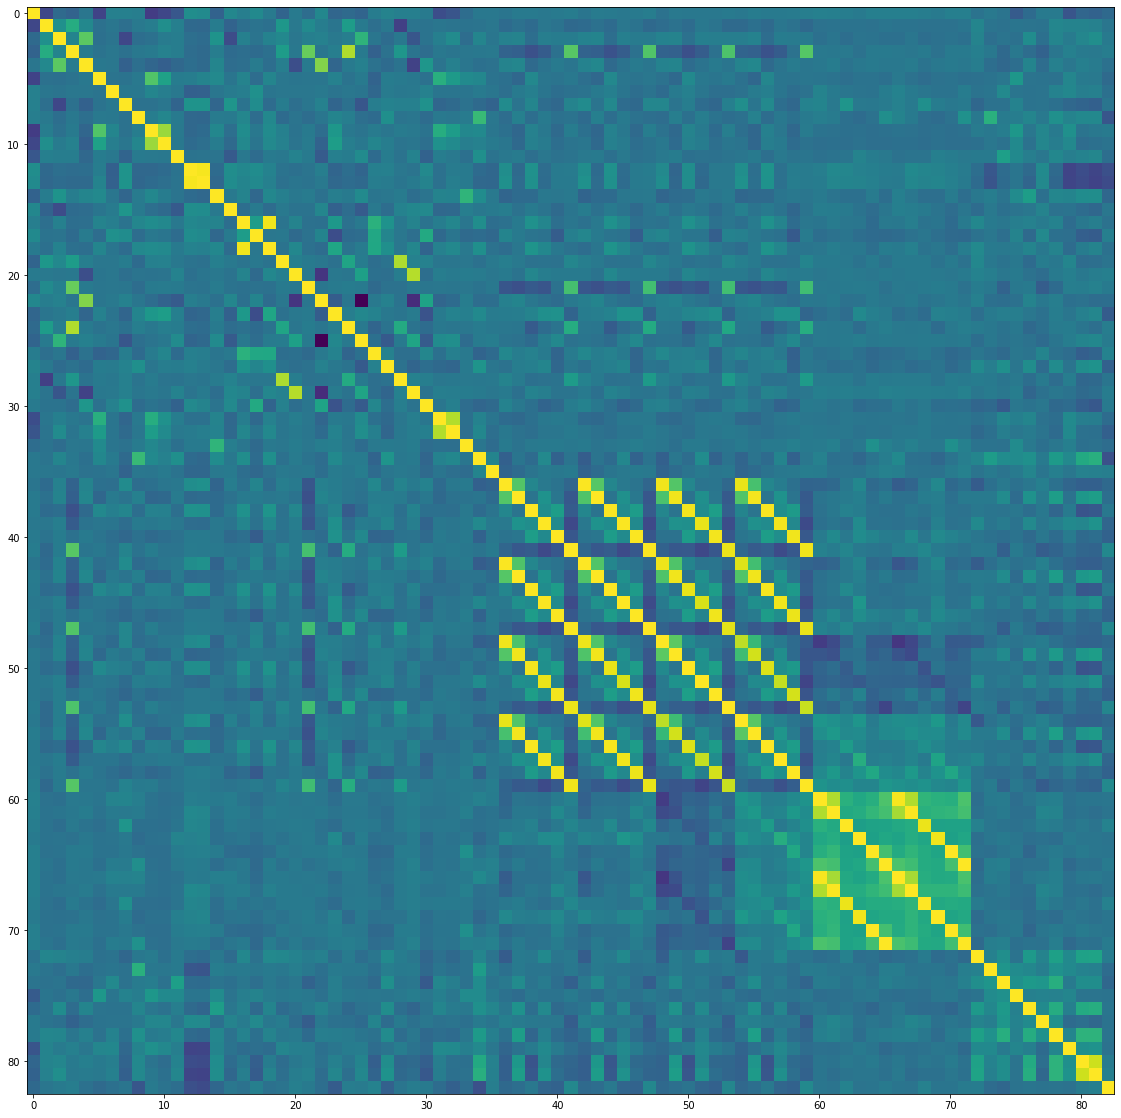

In [ ]:
8# correlation matrix
corr_matrx = new_df.corr()

display(corr_matrx)

fig, axs = plt.subplots(figsize=(20,20))
axs.imshow(corr_matrx)

In [ ]:
A = pd.DataFrame([[1,1],[1,1]])
A.corr()

,0,1
0,NaN,NaN
1,NaN,NaN


,BLOODPRESSURE_DIASTOLIC_MEAN_first,BLOODPRESSURE_SISTOLIC_MEAN_first,HEART_RATE_MEAN_first,RESPIRATORY_RATE_MEAN_first,TEMPERATURE_MEAN_first,OXYGEN_SATURATION_MEAN_first,BLOODPRESSURE_DIASTOLIC_MEDIAN_first,BLOODPRESSURE_SISTOLIC_MEDIAN_first,HEART_RATE_MEDIAN_first,RESPIRATORY_RATE_MEDIAN_first,TEMPERATURE_MEDIAN_first,OXYGEN_SATURATION_MEDIAN_first,BLOODPRESSURE_DIASTOLIC_MIN_first,BLOODPRESSURE_SISTOLIC_MIN_first,HEART_RATE_MIN_first,RESPIRATORY_RATE_MIN_first,TEMPERATURE_MIN_first,OXYGEN_SATURATION_MIN_first,BLOODPRESSURE_DIASTOLIC_MAX_first,BLOODPRESSURE_SISTOLIC_MAX_first,HEART_RATE_MAX_first,RESPIRATORY_RATE_MAX_first,TEMPERATURE_MAX_first,OXYGEN_SATURATION_MAX_first,BLOODPRESSURE_DIASTOLIC_DIFF_first,BLOODPRESSURE_SISTOLIC_DIFF_first,HEART_RATE_DIFF_first,RESPIRATORY_RATE_DIFF_first,TEMPERATURE_DIFF_first,OXYGEN_SATURATION_DIFF_first,BLOODPRESSURE_DIASTOLIC_DIFF_REL_first,BLOODPRESSURE_SISTOLIC_DIFF_REL_first,HEART_RATE_DIFF_REL_first,RESPIRATORY_RATE_DIFF_REL_first,TEMPERATURE_DIFF_REL_first,OXYGEN_SATURATION_DIFF_REL_first
BLOODPRESSURE_DIASTOLIC_MEAN_first,1.000000,0.555328,0.106680,0.015903,-0.024635,-0.112258,0.992302,0.561669,0.105462,0.014860,-0.017033,-0.108580,0.964656,0.556502,0.102694,-0.017622,-0.009152,-0.096645,0.943940,0.516228,0.104662,0.042748,-0.046875,-0.123461,-0.115221,-0.091546,0.009371,0.109478,-0.083521,-0.045476,-0.167244,-0.116387,0.006744,0.118256,-0.086669,-0.047272
BLOODPRESSURE_SISTOLIC_MEAN_first,0.555328,1.000000,-0.021606,0.185679,-0.003096,-0.197392,0.541022,0.996957,-0.021323,0.177539,0.006502,-0.203282,0.532728,0.965548,-0.028865,0.168157,0.001829,-0.189664,0.547675,0.974068,-0.015967,0.191221,-0.018782,-0.184299,-0.018495,0.006901,0.029948,0.060501,-0.044919,0.019489,-0.037445,-0.036387,0.036854,0.052122,-0.046536,0.024510
HEART_RATE_MEAN_first,0.106680,-0.021606,1.000000,0.155495,0.265219,-0.174719,0.102695,-0.026141,0.993374,0.143190,0.262426,-0.179790,0.106350,-0.019345,0.970415,0.149607,0.271010,-0.151266,0.092275,-0.017051,0.981464,0.165334,0.246911,-0.175030,-0.032870,0.005074,0.070274,0.044987,-0.024350,-0.037037,-0.035400,0.009364,-0.020463,0.040939,-0.027682,-0.033318
RESPIRATORY_RATE_MEAN_first,0.015903,0.185679,0.155495,1.000000,0.132377,-0.291331,0.009096,0.190371,0.147140,0.989127,0.130986,-0.290426,0.030520,0.180746,0.166595,0.943933,0.139457,-0.266937,0.007619,0.175980,0.141946,0.967766,0.118541,-0.286285,-0.041696,-0.012156,-0.052232,0.144763,-0.031168,-0.023006,-0.040173,-0.020153,-0.051193,0.065560,-0.031655,-0.021352
TEMPERATURE_MEAN_first,-0.024635,-0.003096,0.265219,0.132377,1.000000,-0.205143,-0.027441,-0.003061,0.258432,0.134748,0.993237,-0.214825,-0.033997,-0.033475,0.261109,0.089703,0.972968,-0.204321,-0.014603,0.026385,0.263194,0.163876,0.967197,-0.190127,0.035985,0.126931,0.016756,0.146399,0.089307,0.036771,0.027766,0.136209,0.001857,0.125671,0.078485,0.038897
OXYGEN_SATURATION_MEAN_first,-0.112258,-0.197392,-0.174719,-0.291331,-0.205143,1.000000,-0.100740,-0.197134,-0.168667,-0.276075,-0.200041,0.990736,-0.132127,-0.201791,-0.194017,-0.297711,-0.205076,0.952701,-0.095460,-0.183031,-0.149441,-0.274799,-0.198120,0.966918,0.073646,0.041982,0.099269,0.010472,-0.006261,-0.020710,0.062165,0.050318,0.112330,0.029702,-0.005264,-0.030896
BLOODPRESSURE_DIASTOLIC_MEDIAN_first,0.992302,0.541022,0.102695,0.009096,-0.027441,-0.100740,1.000000,0.549620,0.104461,0.007568,-0.020104,-0.092783,0.958390,0.546582,0.093625,-0.021677,-0.012253,-0.085670,0.920510,0.496621,0.103030,0.034088,-0.048327,-0.117079,-0.144060,-0.111909,0.026978,0.100549,-0.080237,-0.054634,-0.205808,-0.134104,0.020730,0.109998,-0.083225,-0.058231
BLOODPRESSURE_SISTOLIC_MEDIAN_first,0.561669,0.996957,-0.026141,0.190371,-0.003061,-0.197134,0.549620,1.000000,-0.024943,0.182466,0.006890,-0.201616,0.541829,0.961386,-0.031236,0.172301,-0.001227,-0.190530,0.547654,0.965308,-0.023919,0.196869,-0.015805,-0.186045,-0.034850,-0.002772,0.016323,0.063717,-0.032034,0.017882,-0.055230,-0.048230,0.021724,0.053042,-0

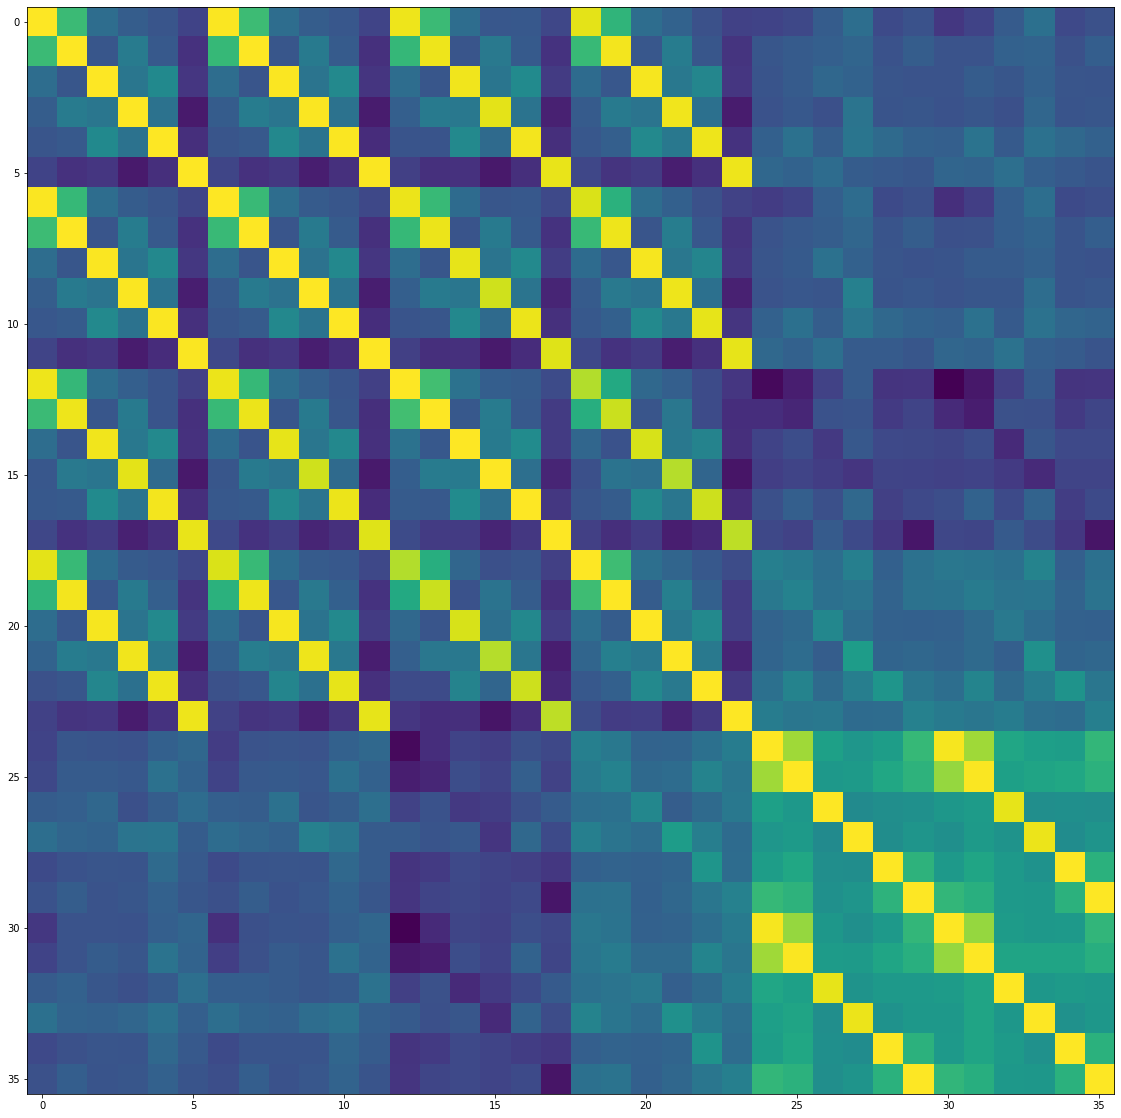

In [ ]:
little_df = new_df.iloc[:, 72: 72+6*6*2]
new_df = new_df.drop(columns=little_df.columns)


corr_matrx = little_df.corr()

display(corr_matrx)

fig, axs = plt.subplots(figsize=(20,20))
axs.imshow(corr_matrx)

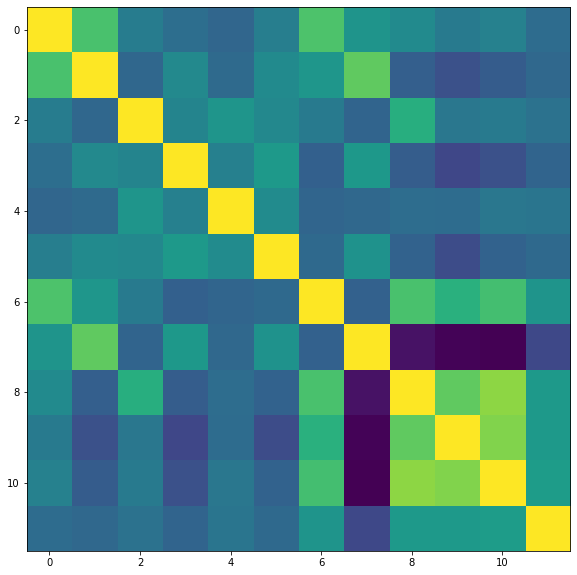

In [ ]:
from sklearn import decomposition

#print(little_df.columns)
pca_features = ['BLOODPRESSURE_DIASTOLIC', 'BLOODPRESSURE_SISTOLIC', 'HEART_RATE', 'RESPIRATORY_RATE', 'TEMPERATURE', 'OXYGEN_SATURATION']

reduced_df = pd.DataFrame()

for end in ['_first', '_last']:

  for feature in pca_features:
    feature_df = little_df[[feature+'_MEAN' + end,
                            feature+'_MEDIAN' + end, 
                            feature+'_MIN' + end, 
                            feature+'_MAX' + end,
                            feature+'_DIFF' + end, 
                            feature+'_DIFF_REL' + end, 
                            ]]
  #display(feature_df)

  #plt.cla()
    pca = decomposition.PCA(n_components=1)
    pca.fit(feature_df)
    X_transformed = pca.transform(feature_df)
    #print(X_transformed[:,0].shape)
    reduced_df[feature + end] = X_transformed[:,0]
    new_df[feature + end] = X_transformed[:,0]

reduced_df
  
corr_matrx = reduced_df.corr()
fig, axs = plt.subplots(figsize=(10,10))
axs.imshow(corr_matrx)

,ALBUMIN_MEDIAN_first,ALBUMIN_MEDIAN_last,BE_ARTERIAL_MEDIAN_first,BE_ARTERIAL_MEDIAN_last,BE_VENOUS_MEDIAN_first,BE_VENOUS_MEDIAN_last,BIC_ARTERIAL_MEDIAN_first,BIC_ARTERIAL_MEDIAN_last,BIC_VENOUS_MEDIAN_first,BIC_VENOUS_MEDIAN_last,BILLIRUBIN_MEDIAN_first,BILLIRUBIN_MEDIAN_last,BLAST_MEDIAN_first,BLAST_MEDIAN_last,CALCIUM_MEDIAN_first,CALCIUM_MEDIAN_last,CREATININ_MEDIAN_first,CREATININ_MEDIAN_last,FFA_MEDIAN_first,FFA_MEDIAN_last,GGT_MEDIAN_first,GGT_MEDIAN_last,GLUCOSE_MEDIAN_first,GLUCOSE_MEDIAN_last,HEMATOCRITE_MEDIAN_first,HEMATOCRITE_MEDIAN_last,HEMOGLOBIN_MEDIAN_first,HEMOGLOBIN_MEDIAN_last,INR_MEDIAN_first,INR_MEDIAN_last,LACTATE_MEDIAN_first,LACTATE_MEDIAN_last,LEUKOCYTES_MEDIAN_first,LEUKOCYTES_MEDIAN_last,LINFOCITOS_MEDIAN_first,LINFOCITOS_MEDIAN_last,NEUTROPHILES_MEDIAN_first,NEUTROPHILES_MEDIAN_last,P02_ARTERIAL_MEDIAN_first,P02_ARTERIAL_MEDIAN_last,P02_VENOUS_MEDIAN_first,P02_VENOUS_MEDIAN_last,PC02_ARTERIAL_MEDIAN_first,PC02_ARTERIAL_MEDIAN_last,PC02_VENOUS_MEDIAN_first,PC02_VENOUS_MEDIAN_last,PCR_MEDIAN_first,PCR_MEDIAN_last,PH_ARTERIAL_MEDIAN_first,PH_ARTERIAL_MEDIAN_last,PH_VENOUS_MEDIAN_first,PH_VENOUS_MEDIAN_last,PLATELETS_MEDIAN_first,PLATELETS_MEDIAN_last,POTASSIUM_MEDIAN_first,POTASSIUM_MEDIAN_last,SAT02_ARTERIAL_MEDIAN_first,SAT02_ARTERIAL_MEDIAN_last,SAT02_VENOUS_MEDIAN_first,SAT02_VENOUS_MEDIAN_last,SODIUM_MEDIAN_first,SODIUM_MEDIAN_last,TGO_MEDIAN_first,TGO_MEDIAN_last,TGP_MEDIAN_first,TGP_MEDIAN_last,TTPA_MEDIAN_first,TTPA_MEDIAN_last,UREA_MEDIAN_first,UREA_MEDIAN_last,DIMER_MEDIAN_first,DIMER_MEDIAN_last,WINDOW,ICU,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,AGE_ABOVE65,AGE_PERCENTIL,GENDER,BLOODPRESSURE_DIASTOLIC_first,BLOODPRESSURE_SISTOLIC_first,HEART_RATE_first,RESPIRATORY_RATE_first,TEMPERATURE_first,OXYGEN_SATURATION_first,BLOODPRESSURE_DIASTOLIC_last,BLOODPRESSURE_SISTOLIC_last,HEART_RATE_last,RESPIRATORY_RATE_last,TEMPERATURE_last,OXYGEN_SATURATION_last
0,0.605263,0.605263,-1.0,-1.0,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-0.938950,-0.93895,-1.0,-1.0,0.183673,0.183673,-0.868365,-0.868365,-0.742004,-0.742004,-0.945093,-0.945093,-0.891993,-0.891993,0.090147,0.090147,0.109756,0.109756,-0.932246,-0.932246,1.000000,1.0,-0.835844,-0.835844,-0.914938,-0.914938,-0.868747,-0.868747,-0.170732,-0.170732,-0.704142,-0.704142,-0.77931,-0.77931,-0.754601,-0.754601,-0.875236,-0.875236,0.234043,0.234043,0.363636,0.363636,-0.540721,-0.540721,-0.518519,-0.518519,0.939394,0.939394,0.345679,0.345679,-0.028571,-0.028571,-0.997201,-0.997201,-0.990854,-0.990854,-0.825613,-0.825613,-0.836145,-0.836145,-0.994912,-0.994912,4,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,60.0,0.0,0.227655,0.149330,-0.075819,-0.250858,-0.693356,0.036383,0.255977,0.432132,-0.277976,-0.249443,-0.470183,-0.165890
2,0.605263,0.605263,-1.0,-1.0,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-0.938950,-0.93895,-1.0,-1.0,0.357143,0.357143,-0.912243,-0.912243,-0.742004,-0.742004,-0.958528,-0.958528,-0.780261,-0.780261,0.144654,0.144654,0.158537,0.158537,-0.959849,-0.959849,1.000000,1.0,-0.382773,-0.382773,-0.908714,-0.908714,-0.412965,-0.412965,-0.170732,-0.170732,-0.704142,-0.704142,-0.77931,-0.77931,-0.754601,-0.754601,-0.939887,-0.939887,0.234043,0.234043,0.363636,0.363636,-0.399199,-0.399199,-0.703704,-0.703704,0.939394,0.939394,0.345679,0.345679,0.085714,0.085714,-0.995428,-0.995428,-0.986662,-0.986662,-0.846633,-0.846633,-0.836145,-0.836145,-0.978029,-0.978029,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,-0.904780,-0.695381,0.388468,-0.308302,0.426333,-0.356088,-0.688663,-0.803609,0.394147,-0.077558,-0.461851,0.125611
3,-0.263158,-0.263158,-1.0,-1.0,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-0.972789,-0.972789,-1.0,-1.0,0.326531,0.326531,-0.968861,-0.968861,-0.194030,-0.19403,-0.316589,-0.316589,-0.891993,-0.891993,-0.203354,-0.203354,-0.219512,-0.219512,-0.959849,-0.959849,-0.828421,-0.828421,-0.729239,-0.729239,

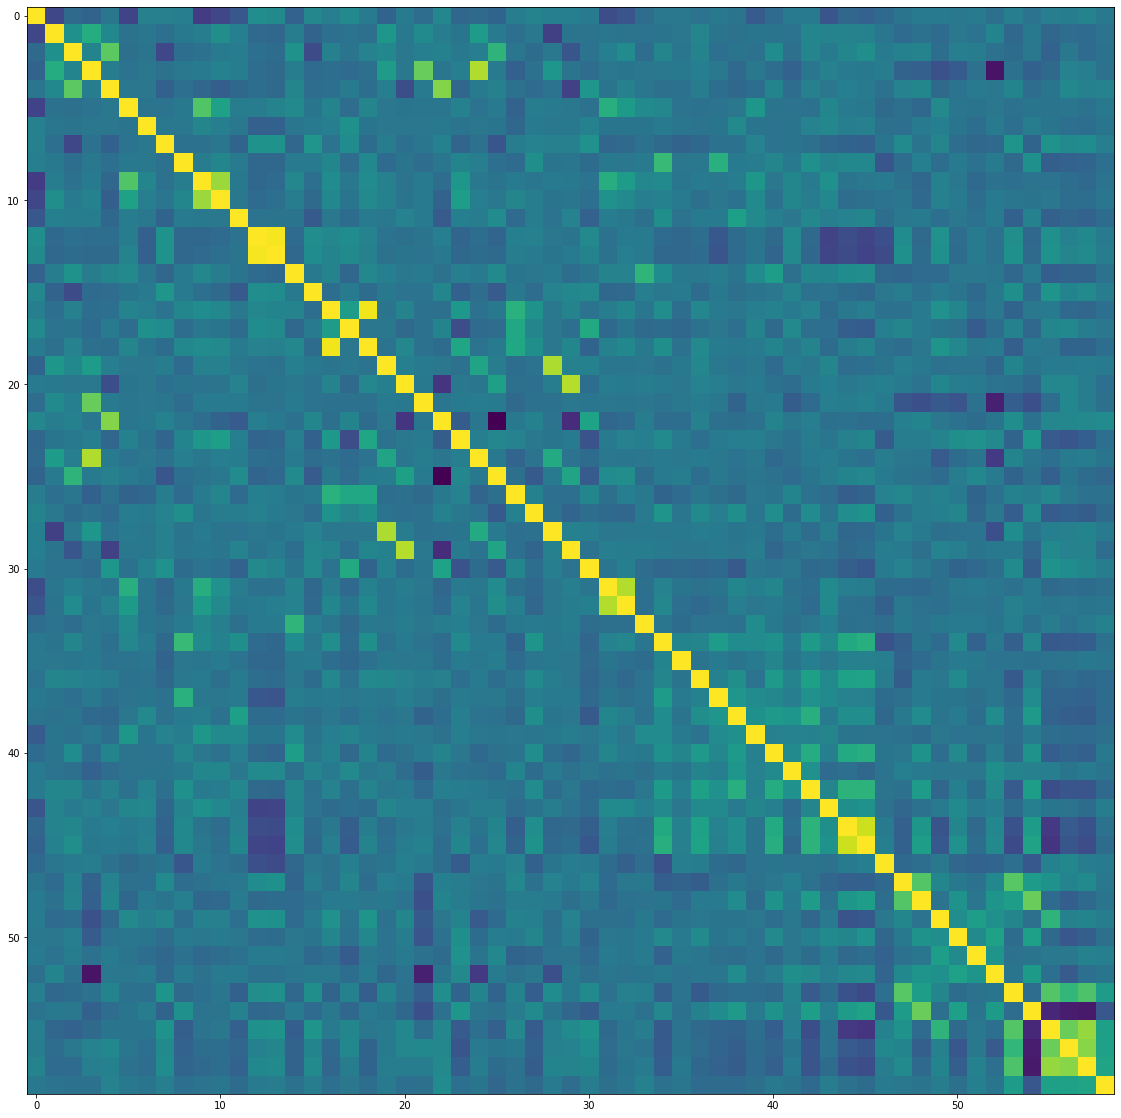

In [ ]:
corr_matrx = new_df.corr()

fig, axs = plt.subplots(figsize=(20,20))
axs.imshow(corr_matrx)

new_df.head(30)

In [ ]:
new_df.to_csv()

',ALBUMIN_MEDIAN_first,ALBUMIN_MEDIAN_last,BE_ARTERIAL_MEDIAN_first,BE_ARTERIAL_MEDIAN_last,BE_VENOUS_MEDIAN_first,BE_VENOUS_MEDIAN_last,BIC_ARTERIAL_MEDIAN_first,BIC_ARTERIAL_MEDIAN_last,BIC_VENOUS_MEDIAN_first,BIC_VENOUS_MEDIAN_last,BILLIRUBIN_MEDIAN_first,BILLIRUBIN_MEDIAN_last,BLAST_MEDIAN_first,BLAST_MEDIAN_last,CALCIUM_MEDIAN_first,CALCIUM_MEDIAN_last,CREATININ_MEDIAN_first,CREATININ_MEDIAN_last,FFA_MEDIAN_first,FFA_MEDIAN_last,GGT_MEDIAN_first,GGT_MEDIAN_last,GLUCOSE_MEDIAN_first,GLUCOSE_MEDIAN_last,HEMATOCRITE_MEDIAN_first,HEMATOCRITE_MEDIAN_last,HEMOGLOBIN_MEDIAN_first,HEMOGLOBIN_MEDIAN_last,INR_MEDIAN_first,INR_MEDIAN_last,LACTATE_MEDIAN_first,LACTATE_MEDIAN_last,LEUKOCYTES_MEDIAN_first,LEUKOCYTES_MEDIAN_last,LINFOCITOS_MEDIAN_first,LINFOCITOS_MEDIAN_last,NEUTROPHILES_MEDIAN_first,NEUTROPHILES_MEDIAN_last,P02_ARTERIAL_MEDIAN_first,P02_ARTERIAL_MEDIAN_last,P02_VENOUS_MEDIAN_first,P02_VENOUS_MEDIAN_last,PC02_ARTERIAL_MEDIAN_first,PC02_ARTERIAL_MEDIAN_last,PC02_VENOUS_MEDIAN_fir

In [ ]:
copy_df = pd.DataFrame()